<a href="https://colab.research.google.com/github/srivishnu2805/MachineLearning-CH.SC.U4CSE23249-SRIVISHNU/blob/main/Linear_Regression/ExerciseProb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R-squared: -11.25
Mean Squared Error: 76.58

Actual vs Predicted (Test Set):
   Actual  Predicted
0      64  56.856510
1      69  79.105761


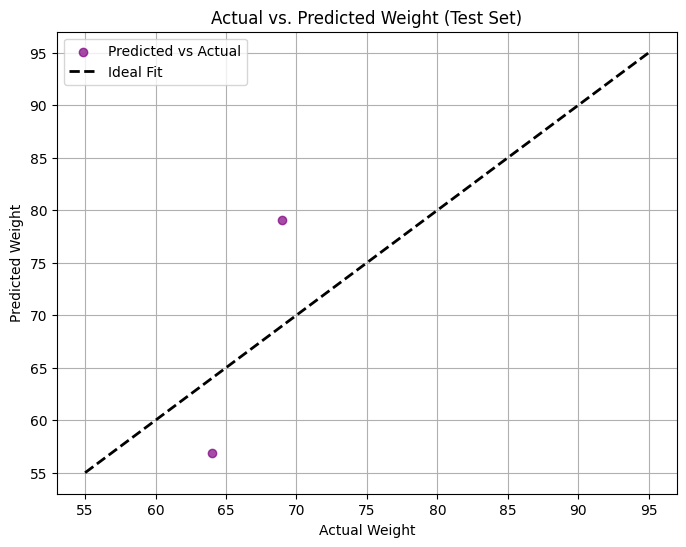

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
               'Female', 'Female', 'Female']
}
df = pd.DataFrame(data)

# One-hot encode 'Gender'
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Define features and target
X = df_encoded[['Height', 'Age', 'Gender_Male']]
y = df_encoded['Weight']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Show actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print("\nActual vs Predicted (Test Set):")
print(predictions_df)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple',
            label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--',
         lw=2, label='Ideal Fit')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs. Predicted Weight (Test Set)")
plt.legend()
plt.grid(True)
plt.show()